<a href="https://colab.research.google.com/github/costpetrides/Brain-Tumor-Classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
!pip install tensorflow tensorflow gpu opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement gpu (from versions: none)
ERROR: No matching distribution found for gpu


In [224]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [225]:
import tensorflow as tf
import os # Navigate through files

In [226]:
# To avoid out-of-memory (OOM) errors :)
gpus = tf. config.experimental.list_physical_devices ('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth (gpu, True)

In [227]:
import cv2
import imghdr

In [228]:
trainingData_dir='/content/drive/MyDrive/DATA/BrainTumor/Training/'
images_ext=['jpeg', 'jpg', 'bmp', 'png']

In [229]:
os.listdir(trainingData_dir)  # We can navigate through BrainTumor/Training files

['notumor', 'pituitary', 'meningioma', 'glioma']

In [230]:
os.listdir(os.path.join(trainingData_dir,'notumor'))  #Now, we can see all data from BrainTumor/Training/notumor :)

['Tr-no_0521.jpg',
 'Tr-no_0396.jpg',
 'Tr-no_0492.jpg',
 'Tr-no_1072.jpg',
 'Tr-no_0538.jpg',
 'Tr-no_0353.jpg',
 'Tr-no_0350.jpg',
 'Tr-no_0461.jpg',
 'Tr-no_0533.jpg',
 'Tr-no_0515.jpg',
 'Tr-no_0953.jpg',
 'Tr-no_0502.jpg',
 'Tr-no_0445.jpg',
 'Tr-no_0910.jpg',
 'Tr-no_0713.jpg',
 'Tr-no_0541.jpg',
 'Tr-no_1069.jpg',
 'Tr-no_0770.jpg',
 'Tr-no_0870 (1).jpg',
 'Tr-no_0467.jpg',
 'Tr-no_0617.jpg',
 'Tr-no_0995.jpg',
 'Tr-no_0893.jpg',
 'Tr-no_0924.jpg',
 'Tr-no_0862.jpg',
 'Tr-no_0902.jpg',
 'Tr-no_1013.jpg',
 'Tr-no_0378.jpg',
 'Tr-no_0674.jpg',
 'Tr-no_0648.jpg',
 'Tr-no_0721.jpg',
 'Tr-no_0919.jpg',
 'Tr-no_0963.jpg',
 'Tr-no_0945.jpg',
 'Tr-no_1071.jpg',
 'Tr-no_0403.jpg',
 'Tr-no_0814.jpg',
 'Tr-no_0746.jpg',
 'Tr-no_0478.jpg',
 'Tr-no_1065.jpg',
 'Tr-no_0823.jpg',
 'Tr-no_0501.jpg',
 'Tr-no_0744.jpg',
 'Tr-no_0695.jpg',
 'Tr-no_0497.jpg',
 'Tr-no_0754.jpg',
 'Tr-no_0432.jpg',
 'Tr-no_0591.jpg',
 'Tr-no_0391.jpg',
 'Tr-no_0618.jpg',
 'Tr-no_0809.jpg',
 'Tr-no_0703.jpg',
 'Tr-no_

In [231]:
# Checking  if the images have file extensions that are not in the images_ext list and also handles any issues with reading the images!

for image_class in os.listdir(trainingData_dir):
  for image in os.listdir(os.path.join (trainingData_dir, image_class)):
    image_path = os.path.join(trainingData_dir, image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what (image_path)
      if tip not in images_ext:
        print ('Image not in ext list (}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

Issue with image /content/drive/MyDrive/DATA/BrainTumor/Training/notumor/Tr-no_1001.jpg


In [232]:
# Lets chek the image above !

img = cv2.imread('/content/drive/MyDrive/DATA/BrainTumor/Training/notumor/Tr-no_1001.jpg')
img.shape # image shape: (Height  [pixels], Width   [pixels],   number of color channels)

(275, 220, 3)

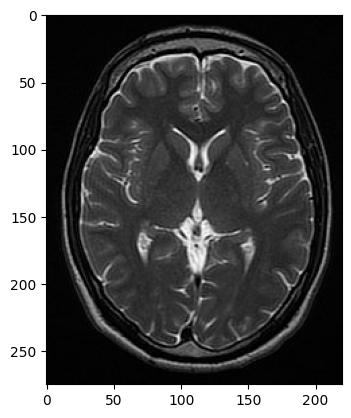

In [233]:
# Show image "Tr-no_1001.jpg"
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# In case whcihc is not .jpg we can use plt.imshow(cv2. cvtColor(img, cv2. COLOR_BGR2RGB)) :)

In [234]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [235]:
import numpy as np

#import our data and make the training dataset :)
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/DATA/BrainTumor/Training/')

Found 5722 files belonging to 4 classes.


**Specs of our generated dataset**

**def** image_dataset_from_directory(

    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
**):**

In [236]:
# Batch of data
data_iterator = data.as_numpy_iterator()
batch=data_iterator.next()

In [237]:
len(batch) # Must be 2 (iamges and labels)

2

In [238]:
batch[1] # For a specific batch of data, we can see the class of each one of them !

array([0, 3, 1, 3, 1, 2, 1, 0, 3, 1, 1, 2, 2, 0, 3, 2, 1, 2, 1, 0, 2, 1,
       0, 3, 1, 1, 3, 3, 1, 1, 2, 2], dtype=int32)

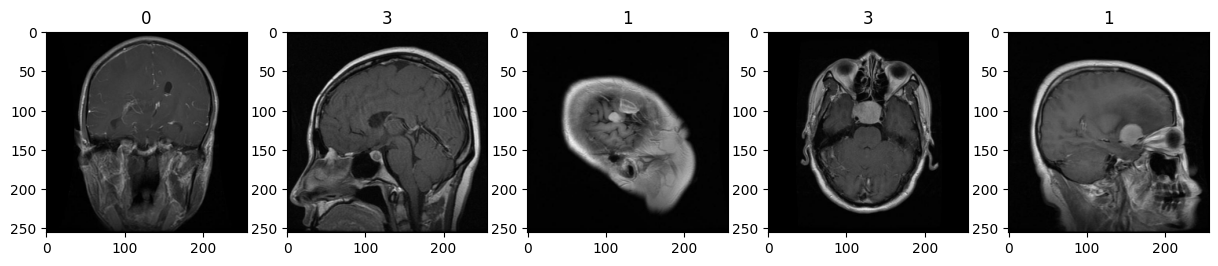

In [239]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [240]:
scaled=batch[0]/255

In [241]:
# Scale our data
data=data.map(lambda x,y: (x/255,y))

In [242]:
scaled_interior = data.as_numpy_iterator()

In [243]:
batch = scaled_interior.next()

In [244]:
batch[0].max()

1.0

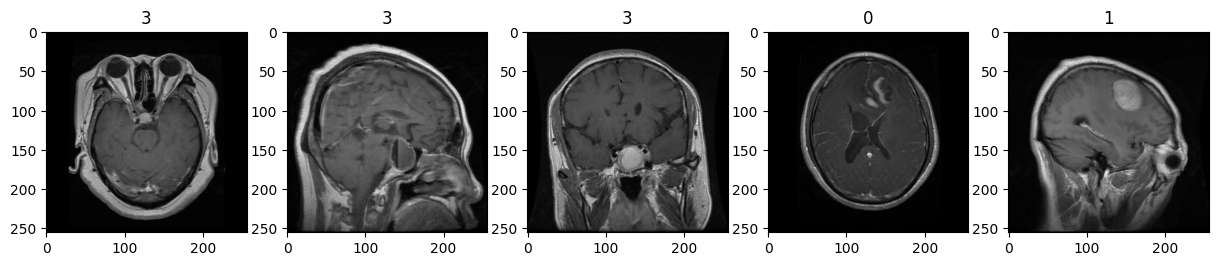

In [249]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img)                    # SOS. is scled so dont use as integer !
  ax[idx].title.set_text(batch[1][idx])

In [270]:
len(data)  #Number of batches with 32 images each !!!

179

# Deep learning model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  # The Layers :)

In [ ]:
model = Sequential()

In [288]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256, 3)))
model. add (MaxPooling2D ())

model.add(Conv2D (32, (3,3), 1, activation= 'relu'))
model. add (MaxPooling2D ())

model.add(Conv2D (16, (3,3), 1, activation='relu'))
model. add (MaxPooling2D ())

model.add(Flatten())

model.add(Dense (256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [289]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # We can use any optimizer

In [290]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
from keras.src.callbacks import TensorBoard
# Train our model

logdir='/content/drive/MyDrive/DATA/BrainTumor/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


hist=model.fit(data, epochs=20, validation_data=val, callbacks=[tensorboard_callback])